In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel('Boston.xlsx')

In [20]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [21]:
df.shape

(506, 13)

In [22]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

## Initial data manipulation and exploration

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'lstat'}>],
       [<Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

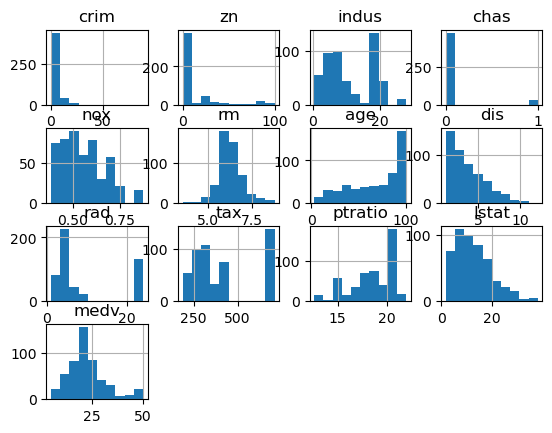

In [23]:
# Histograms.  Do they look "healthy"?  (Are the skewed in one direction?  Are they bimodal? 
# For OLS, you really want to have "Gaussian shaped" histograms, and not all features have this property here.
# At this point we just make a note of this, later you can try to improve the outcome by manipulating the
# features. 
df.hist()

In [24]:
# Are there missing values?  Look at the "Count" row to see how many entries are available for each column.
# Verify that there are no missing values.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


##  We are ready to try our first go at OLS.  In the next code cell, you will learn how to use sklearn's OLS by a toy example.  Please carefully inspect this toy example, and make sure you understand what is going on, especially the process of "fitting" (on the training data) and "predicting" (on both training and validation).  Repeat the same process below on the Boston data, using medv as the target.

In [25]:
### Toy Example (synthetic) ordinary linear regression (OLS)
import numpy as np
from sklearn.linear_model import LinearRegression
x1 = np.random.rand(100)
x2 = np.random.rand(100)
data_train = pd.DataFrame({
    'x1' : np.random.rand(100)*10,
    'x2' : np.random.rand(100)*10,
})
data_test = pd.DataFrame({
    'x1' : np.random.rand(100)*10,
    'x2' : np.random.rand(100)*10,
})

# Synthetically create a label that is a close to being a linear combination of the two features, plus some "noise".
y_train = data_train['x1'] + 2 * data_train['x2'] + np.random.rand(100)*10
y_test = data_test['x1'] + 2 * data_test['x2'] + np.random.rand(100)*10

lr = LinearRegression()
lr.fit(data_train, y_train)
print (f"Train R^2 score: {lr.score(data_train, y_train)}")
print (f"Test R^2 score: {lr.score(data_test, y_test)}")

# Get predictions
data_train['y_predicted'] = lr.predict(data_train)
data_test['y_predicted'] = lr.predict(data_test)


## In order to do "Ridge regression" (L2 regularization)
# from sklearn.linear_model import Ridge
# ridge_lr = Ridge(alpha=....)
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
## Lasso (L1 regularization)
# from sklearn.linear_model import Lasso
# lasso_lr = Lasso(alpha=....)
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


Train R^2 score: 0.8377146277743173
Test R^2 score: 0.8488136495253212


## After making sure you understand the example, go ahead and run OLS on the Boston data, with medv as the target. First you will need to split the data to train (in this case, 80%) and test (the remaining 20%). Output the R-squared score of the model on both the training and on the test set, as well as the MSE on both.  You can use sklearn.metrics.r2_score for getting the R2 score, or do it as above using the trained LinearRegression object. You can use sklearn.metrics.mean_squared_error for the MSE.  Refer to the documentation of sklearn for usage of both.


In [26]:
# No missing values, all features numerical, let's try OLS.  
# First, let's do standars scaling of the variables.
# you code here...

from sklearn.preprocessing import StandardScaler

#standard scaling of the variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('medv', axis=1)), columns=df.columns[:-1])

# Adding the target variable 'medv' back to the scaled dataframe
df_scaled['medv'] = df['medv']

#Printing the result to check
print(df_scaled.head())

       crim        zn     indus      chas       nox        rm       age  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio     lstat  medv  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  24.0  
1  0.557160 -0.867883 -0.987329 -0.303094 -0.492439  21.6  
2  0.557160 -0.867883 -0.987329 -0.303094 -1.208727  34.7  
3  1.077737 -0.752922 -1.106115  0.113032 -1.361517  33.4  
4  1.077737 -0.752922 -1.106115  0.113032 -1.026501  36.2  


In [27]:
# Split the data into train and test
# your code here...
from sklearn.model_selection import train_test_split

# Selecting the target variable and features
X = df_scaled.drop('medv', axis=1)
y = df_scaled['medv']

# Splitting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Train the linear regression algorithm on the training set, compute MSE and R2 on both training and test
# Your code here...
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")


Train R2: 0.739801993681731
Test R2: 0.6893967884614753
Train MSE: 22.60428647941742
Test MSE: 22.777708563866085


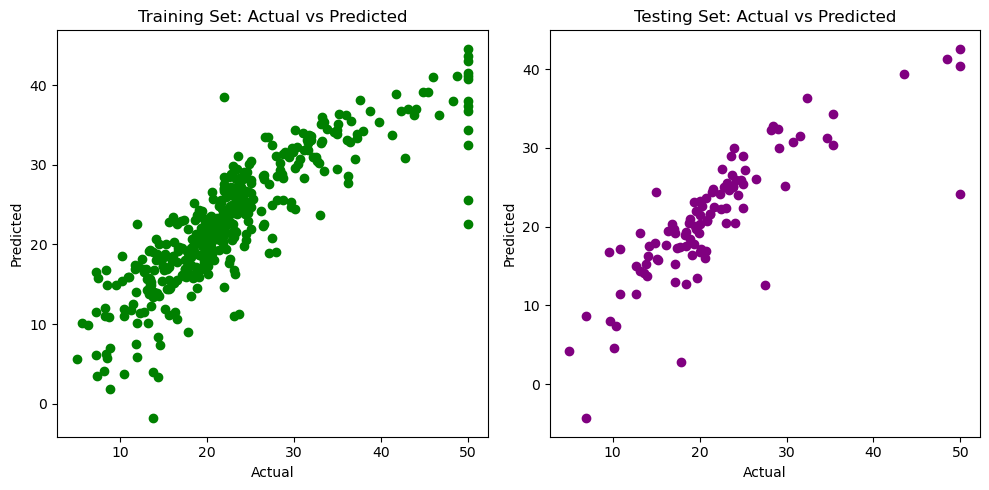

In [29]:
# A good way to visualize the error structure is to plot the label y against the predicted (y-hat) in the same plot.
# Do this for both train and test and inspect the result.  Do the residuals seem to be evenly distributed across
# the range of y values, or are they higher when y is high?  Perhaps they are  higher when y is low?
# Plotting actual vs predicted values for training and testing sets
plt.figure(figsize=(10, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set: Actual vs Predicted')

# Testing set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='purple')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing Set: Actual vs Predicted')

plt.tight_layout()
plt.show()


## The goal of the next part is to try to create a "sweet spot" plot with ridge regression, using the alpha parameter as a model complexity knob.  To make the plot clearer, first chop off everything but the first 50 rows of X_train and y_train (this is not something you want to do in general, it is just to get the plot), but store the chopped version in a different variable, because you will need the full X_train and y_train later.  In a loop with alpha in 0,1,2,3,...,49 train a linear Ridge regression (see comments in the toy example above for instructions), and store both the training R2 metric (or MSE) and the test R2 metric (or MSE) in arrays.  There should be a total of 50 evaluation metrics for both training and testing.  Now plot the evaluation metric for the training data, against the alpha parameter (in blue), and the same for the testing data (in red).  Does the sweet-splot pattern emerge?

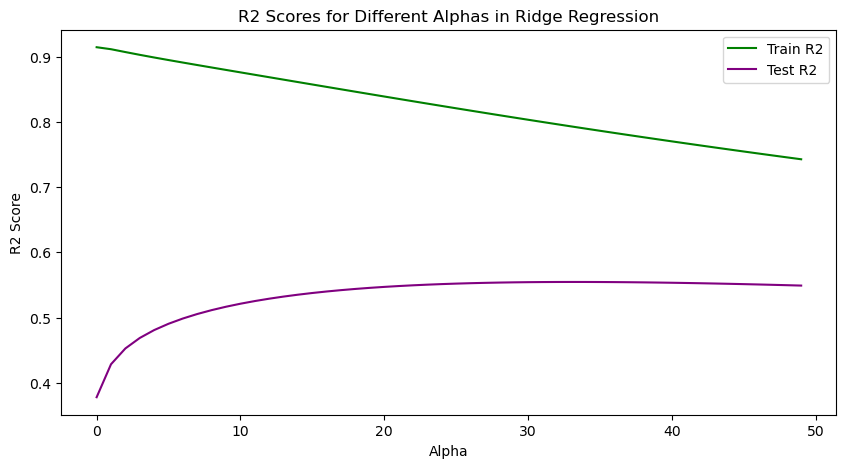

In [30]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
# Your code here...


#first 50 rows
X_train_chopped = X_train[:50]
y_train_chopped = y_train[:50]

#creating arrays to store the R2 scores
train_r2_scores = []
test_r2_scores = []

# Train Ridge regression for alpha values from 0 to 49
for alpha in range(50):
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_chopped, y_train_chopped)

    # Append R2 scores for training and testing sets
    train_r2_scores.append(ridge_model.score(X_train_chopped, y_train_chopped))
    test_r2_scores.append(ridge_model.score(X_test, y_test))

# Plot the R2 scores
plt.figure(figsize=(10, 5))
plt.plot(range(50), train_r2_scores, label='Train R2', color='green')
plt.plot(range(50), test_r2_scores, label='Test R2', color='purple')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Alphas in Ridge Regression')
plt.legend()
plt.show()

## Finally in the code cells before, try to get a better result (than the OLS experiment) by possibly manipulating features, using Ridge/Lasso with various parameters etc. You are free to try everything you have learned so far.  Do not use the chopped training data from the last step - use the enire

In [31]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
import numpy as np

####
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Increasing the range of alpha values for hyperparameter tuning
alphas = np.logspace(-4, 4, 100)

# Lasso with Cross-Validation
lasso_cv = LassoCV(alphas=alphas, max_iter=10000, random_state=0)
lasso_cv.fit(X_train_scaled, y_train)
lasso_test_r2 = lasso_cv.score(X_test_scaled, y_test)

# Ridge with Cross-Validation
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train_scaled, y_train)
ridge_test_r2 = ridge_cv.score(X_test_scaled, y_test)

print(f"Lasso - Best Alpha: {lasso_cv.alpha_}, Test R2: {lasso_test_r2}")
print(f"Ridge - Best Alpha: {ridge_cv.alpha_}, Test R2: {ridge_test_r2}")

Lasso - Best Alpha: 0.0001, Test R2: 0.6893876284133218
Ridge - Best Alpha: 7.054802310718645, Test R2: 0.6862905303953171
